# xarray package

xarray is a crossbreed between numpy and pandas. It allows to annotate pure numerical (numpy-like) data with indices, attributes and so on.

## Required imports

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import sys
import xarray as xr

## Running example

Create a 2D array of floating point values that represent temperatures of a plane. The dimensions are named `x` and `y`, and the coordinates for those dimensions are provided.

In [2]:
grid_size = 11
temperature = xr.DataArray(np.random.normal(loc=21.0, scale=2.0, size=(grid_size, grid_size)),
                           dims=('x', 'y'), coords={'x': np.linspace(0.0, 1.0, grid_size),
                                                    'y': np.linspace(0.0, 1.0, grid_size)})
temperature

<xarray.DataArray (x: 11, y: 11)>
array([[22.57434967, 18.9545404 , 23.71126177, 20.10369652, 20.42903562,
        21.99424346, 19.01915315, 23.52161661, 19.95520048, 23.91308035,
        17.54559125],
       [22.25709658, 21.87806775, 19.41716026, 22.11269857, 19.78200523,
        20.44920664, 18.19519786, 20.08703814, 20.71606606, 22.47236078,
        21.74689995],
       [20.5625017 , 22.05083949, 21.95732169, 17.47612362, 19.87772883,
        21.94072604, 22.00168891, 22.43482559, 24.79262302, 20.29191436,
        18.30555044],
       [18.72151752, 21.46954344, 25.05141603, 24.5001031 , 22.15441922,
        18.73215314, 23.18644216, 21.44794374, 18.62120212, 16.86028957,
        23.96180751],
       [19.11873368, 21.57348695, 19.76372872, 21.36697878, 22.65042091,
        22.80684945, 20.49398006, 20.2695466 , 21.78867674, 24.38193689,
        24.61066743],
       [19.99932104, 20.57241287, 23.59508175, 19.46785632, 20.68334031,
        23.11870648, 16.31390571, 20.2654778 , 21.75407437, 19.08934392,
        22.06232585],
       [22.39604594, 19.2314135 , 19.17910261, 21.47735363, 17.52693194,
        22.60296343, 23.34667823, 21.06888182, 18.52592886, 19.39018055,
        22.55640252],
       [22.32223847, 22.81747289, 18.37844145, 21.10576001, 22.24295744,
        19.86546734, 25.00695312, 19.97707261, 20.08962417, 20.41009906,
        21.16657101],
       [18.4188453 , 23.48988415, 21.95504864, 21.41116603, 23.55451612,
        22.58808432, 20.92057409, 23.28880561, 22.25891661, 23.89341775,
        22.87442428],
       [21.85546146, 17.22067194, 22.12433162, 21.26206679, 21.34416812,
        24.15464899, 21.57123663, 18.76124212, 22.15520087, 18.96670815,
        21.9385253 ],
       [21.47985149, 22.04392962, 22.22475834, 21.06548021, 24.33369792,
        20.35700529, 22.4617063 , 21.67978738, 22.11073535, 17.08955224,
        21.81306346]])
Coordinates:
  * x        (x) float64 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0
  * y        (y) float64 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0

## Accessing data

The elements can be accessed as you would do for a numpy array as well.

In [3]:
temperature[1, 2]

<xarray.DataArray ()>
array(19.41716026)
Coordinates:
    x        float64 0.1
    y        float64 0.2

Note however that the result is a new xarray, althought it contains only a single element.  An advantage of this is that the coordinates are part of the result.

The values of the xarray `temperature` can now be accessed by index, i.e., the value of the coordinates, e.g., the temperature at $x = 0.1$ and $y = 0.2$ is given by:

In [4]:
temperature.sel(x=0.1, y=0.2)

<xarray.DataArray ()>
array(19.41716026)
Coordinates:
    x        float64 0.1
    y        float64 0.2

Note that using `float` coordinates may lead to unexpected results due to round off errors.

In [5]:
try:
    temperature.sel(x=0.1, y=0.200000000001)
except KeyError as e:
    print(f'KeyError for {e}', file=sys.stderr)

KeyError for 0.200000000001


It is straightforward to interpolate, as we'll discuss in a [later section](#Interpolation).

xarrays can be indexed by slicing as well.  Note that you need to use the `slice` function.

In [6]:
temperature.sel(x=slice(0.2, 0.8), y=slice(0.1, 0.3))

<xarray.DataArray (x: 7, y: 2)>
array([[22.05083949, 21.95732169],
       [21.46954344, 25.05141603],
       [21.57348695, 19.76372872],
       [20.57241287, 23.59508175],
       [19.2314135 , 19.17910261],
       [22.81747289, 18.37844145],
       [23.48988415, 21.95504864]])
Coordinates:
  * x        (x) float64 0.2 0.3 0.4 0.5 0.6 0.7 0.8
  * y        (y) float64 0.1 0.2

It is also possible to select values from an xarray using integer location indices on specific dimensions without worrying about the layout of the array.

In [7]:
temperature.isel(x=1, y=2)

<xarray.DataArray ()>
array(19.41716026)
Coordinates:
    x        float64 0.1
    y        float64 0.2

A scalar value can be obtained using the `float` constructor.

In [8]:
float(temperature.isel(x=1, y=2))

19.41716025838715

As in pandas, direct access to the underlying numpy array is available as well.

In [9]:
print(type(temperature.values), temperature.values.dtype, temperature.values.shape)

<class 'numpy.ndarray'> float64 (11, 11)


## Metadata

Like a numpy array, the data type and shape of an xarray can be easily obtained.

In [10]:
print(temperature.dtype, temperature.shape)

float64 (11, 11)


The dimensions can be retrieved.

In [11]:
temperature.dims

('x', 'y')

The coordinates associated with an xarray can be retrieved as well.

In [12]:
temperature.coords['x']

<xarray.DataArray 'x' (x: 11)>
array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])
Coordinates:
  * x        (x) float64 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0

This can be quite convenient to reuse the same coordinates in a new xarray.

In [13]:
pressure = xr.DataArray(np.random.normal(loc=1.1e5, scale=3e3, size=temperature.shape),
                        dims=temperature.dims, coords=temperature.coords)
pressure

<xarray.DataArray (x: 11, y: 11)>
array([[113681.49891279, 107574.72543152, 111575.59481009,
        105268.33175541, 109625.59508959, 104991.44063306,
        110784.11184127, 110950.28633424, 111124.93161368,
        113309.44858059, 109734.97963278],
       [110998.75614149, 106712.30566228, 108917.2829482 ,
        112856.7167359 , 113099.54707844, 109312.84948215,
        109775.15850176, 113287.40447883, 109254.30903957,
        106667.41018158, 110288.30756804],
       [112749.66844826, 113377.66567364, 113706.41448946,
        110715.65842124, 112514.90129615, 114745.36573203,
        112841.18582074, 114133.98170927, 105465.87295013,
        108378.36393479, 103719.78961764],
       [113290.60446909, 109927.69225827, 109425.15258999,
        113713.42377384, 112717.06637119, 108957.38635834,
        117603.92741717, 110631.7431021 , 109361.4458178 ,
        109628.01184457, 104525.92653786],
       [109627.08118902, 112740.06725246, 108377.45039036,
        107505.70744829, 110478.22257411, 107364.82753537,
        107961.32426005, 103974.63437816, 111042.07724221,
        109010.09684854, 108773.65063559],
...
       [105562.88467537, 111931.72596422, 114443.44150594,
        105743.69907007, 108170.91687004, 104224.71099003,
        111079.89176708, 112118.39935846, 107880.90710545,
        107551.98352642, 109265.66716016],
       [111884.07847679, 111561.62098995, 102016.29962257,
        106634.51322477, 111803.30592079, 110956.22514871,
        104412.04778602, 113673.21190061, 107817.70830623,
        112562.52175567, 112868.44965801],
       [110479.49176218, 110804.48595946, 109768.56261906,
        108439.91616367, 108707.40369538, 108869.90076462,
        110133.57860591, 111098.11978935, 116551.3295808 ,
        107356.79540637, 109389.38463494],
       [113103.85808058, 112315.78201912, 111325.3225198 ,
        111398.45690563, 108134.46468065, 107956.05876342,
        108412.79612146, 113464.00008095, 109669.15313825,
        110895.25567714, 112177.8393465 ],
       [105269.22608631, 111075.55262817, 111424.9642551 ,
        110383.82876284, 111303.03171273, 105448.85423657,
        108750.27693033, 113730.87292861, 109111.58741648,
        107999.16111684, 105455.10927893]])
Coordinates:
  * x        (x) float64 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0
  * y        (y) float64 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0

Arbitrary attributes can be added to an xarray to store additional metadata.

In [14]:
pressure.attrs['units'] = 'P'
pressure.attrs['source'] = 'random data'
pressure

<xarray.DataArray (x: 11, y: 11)>
array([[113681.49891279, 107574.72543152, 111575.59481009,
        105268.33175541, 109625.59508959, 104991.44063306,
        110784.11184127, 110950.28633424, 111124.93161368,
        113309.44858059, 109734.97963278],
       [110998.75614149, 106712.30566228, 108917.2829482 ,
        112856.7167359 , 113099.54707844, 109312.84948215,
        109775.15850176, 113287.40447883, 109254.30903957,
        106667.41018158, 110288.30756804],
       [112749.66844826, 113377.66567364, 113706.41448946,
        110715.65842124, 112514.90129615, 114745.36573203,
        112841.18582074, 114133.98170927, 105465.87295013,
        108378.36393479, 103719.78961764],
       [113290.60446909, 109927.69225827, 109425.15258999,
        113713.42377384, 112717.06637119, 108957.38635834,
        117603.92741717, 110631.7431021 , 109361.4458178 ,
        109628.01184457, 104525.92653786],
       [109627.08118902, 112740.06725246, 108377.45039036,
        107505.70744829, 110478.22257411, 107364.82753537,
        107961.32426005, 103974.63437816, 111042.07724221,
        109010.09684854, 108773.65063559],
...
       [105562.88467537, 111931.72596422, 114443.44150594,
        105743.69907007, 108170.91687004, 104224.71099003,
        111079.89176708, 112118.39935846, 107880.90710545,
        107551.98352642, 109265.66716016],
       [111884.07847679, 111561.62098995, 102016.29962257,
        106634.51322477, 111803.30592079, 110956.22514871,
        104412.04778602, 113673.21190061, 107817.70830623,
        112562.52175567, 112868.44965801],
       [110479.49176218, 110804.48595946, 109768.56261906,
        108439.91616367, 108707.40369538, 108869.90076462,
        110133.57860591, 111098.11978935, 116551.3295808 ,
        107356.79540637, 109389.38463494],
       [113103.85808058, 112315.78201912, 111325.3225198 ,
        111398.45690563, 108134.46468065, 107956.05876342,
        108412.79612146, 113464.00008095, 109669.15313825,
        110895.25567714, 112177.8393465 ],
       [105269.22608631, 111075.55262817, 111424.9642551 ,
        110383.82876284, 111303.03171273, 105448.85423657,
        108750.27693033, 113730.87292861, 109111.58741648,
        107999.16111684, 105455.10927893]])
Coordinates:
  * x        (x) float64 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0
  * y        (y) float64 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0
Attributes:
    units:    P
    source:   random data

## File I/O

xarrays can be stored in NetCDF format, which can be used with many scientific and visualization software packages.

In [15]:
pressure.to_netcdf('pressure.nc')

In [16]:
!ls

README.md  pressure.nc	xarray_intro.ipynb


To demonstrate that this is lossless, we remove the original xarray, and reinstantiate it from the NetCDF file that was saved to disk.

In [17]:
del pressure

In [18]:
pressure = xr.open_dataarray('pressure.nc')
pressure

<xarray.DataArray (x: 11, y: 11)>
array([[113681.498913, 107574.725432, 111575.59481 , 105268.331755,
        109625.59509 , 104991.440633, 110784.111841, 110950.286334,
        111124.931614, 113309.448581, 109734.979633],
       [110998.756141, 106712.305662, 108917.282948, 112856.716736,
        113099.547078, 109312.849482, 109775.158502, 113287.404479,
        109254.30904 , 106667.410182, 110288.307568],
       [112749.668448, 113377.665674, 113706.414489, 110715.658421,
        112514.901296, 114745.365732, 112841.185821, 114133.981709,
        105465.87295 , 108378.363935, 103719.789618],
       [113290.604469, 109927.692258, 109425.15259 , 113713.423774,
        112717.066371, 108957.386358, 117603.927417, 110631.743102,
        109361.445818, 109628.011845, 104525.926538],
       [109627.081189, 112740.067252, 108377.45039 , 107505.707448,
        110478.222574, 107364.827535, 107961.32426 , 103974.634378,
        111042.077242, 109010.096849, 108773.650636],
       [113672.194942, 112076.062684, 117283.516963, 110135.756885,
        105876.061492, 112767.346872, 108572.108514, 105801.444041,
        114162.103277, 108063.749401, 113230.574748],
       [105562.884675, 111931.725964, 114443.441506, 105743.69907 ,
        108170.91687 , 104224.71099 , 111079.891767, 112118.399358,
        107880.907105, 107551.983526, 109265.66716 ],
       [111884.078477, 111561.62099 , 102016.299623, 106634.513225,
        111803.305921, 110956.225149, 104412.047786, 113673.211901,
        107817.708306, 112562.521756, 112868.449658],
       [110479.491762, 110804.485959, 109768.562619, 108439.916164,
        108707.403695, 108869.900765, 110133.578606, 111098.119789,
        116551.329581, 107356.795406, 109389.384635],
       [113103.858081, 112315.782019, 111325.32252 , 111398.456906,
        108134.464681, 107956.058763, 108412.796121, 113464.000081,
        109669.153138, 110895.255677, 112177.839347],
       [105269.226086, 111075.552628, 111424.964255, 110383.828763,
        111303.031713, 105448.854237, 108750.27693 , 113730.872929,
        109111.587416, 107999.161117, 105455.109279]])
Coordinates:
  * x        (x) float64 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0
  * y        (y) float64 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0
Attributes:
    units:    P
    source:   random data

All metadata, including coordinates and attributes has been preserved.

## Numerical computations

Numerical operations are broadcasted along the dimensions, so to initialize a 2D array of complex numbers, we can simply initialize the real values as an xarray with dimension `re`, the imaginary values as an xarray with dimension `im`, and add the two 1D arrays to obtain a complex-valued 2D array.

In [19]:
real_vals = xr.DataArray(np.linspace(0.0, 1.0, 11), dims='re')
im_vals = xr.DataArray(np.linspace(0.0j, 1.0j, 11), dims='im')

In [20]:
vals = real_vals + im_vals
vals

<xarray.DataArray (re: 11, im: 11)>
array([[0. +0.j , 0. +0.1j, 0. +0.2j, 0. +0.3j, 0. +0.4j, 0. +0.5j,
        0. +0.6j, 0. +0.7j, 0. +0.8j, 0. +0.9j, 0. +1.j ],
       [0.1+0.j , 0.1+0.1j, 0.1+0.2j, 0.1+0.3j, 0.1+0.4j, 0.1+0.5j,
        0.1+0.6j, 0.1+0.7j, 0.1+0.8j, 0.1+0.9j, 0.1+1.j ],
       [0.2+0.j , 0.2+0.1j, 0.2+0.2j, 0.2+0.3j, 0.2+0.4j, 0.2+0.5j,
        0.2+0.6j, 0.2+0.7j, 0.2+0.8j, 0.2+0.9j, 0.2+1.j ],
       [0.3+0.j , 0.3+0.1j, 0.3+0.2j, 0.3+0.3j, 0.3+0.4j, 0.3+0.5j,
        0.3+0.6j, 0.3+0.7j, 0.3+0.8j, 0.3+0.9j, 0.3+1.j ],
       [0.4+0.j , 0.4+0.1j, 0.4+0.2j, 0.4+0.3j, 0.4+0.4j, 0.4+0.5j,
        0.4+0.6j, 0.4+0.7j, 0.4+0.8j, 0.4+0.9j, 0.4+1.j ],
       [0.5+0.j , 0.5+0.1j, 0.5+0.2j, 0.5+0.3j, 0.5+0.4j, 0.5+0.5j,
        0.5+0.6j, 0.5+0.7j, 0.5+0.8j, 0.5+0.9j, 0.5+1.j ],
       [0.6+0.j , 0.6+0.1j, 0.6+0.2j, 0.6+0.3j, 0.6+0.4j, 0.6+0.5j,
        0.6+0.6j, 0.6+0.7j, 0.6+0.8j, 0.6+0.9j, 0.6+1.j ],
       [0.7+0.j , 0.7+0.1j, 0.7+0.2j, 0.7+0.3j, 0.7+0.4j, 0.7+0.5j,
        0.7+0.6j, 0.7+0.7j, 0.7+0.8j, 0.7+0.9j, 0.7+1.j ],
       [0.8+0.j , 0.8+0.1j, 0.8+0.2j, 0.8+0.3j, 0.8+0.4j, 0.8+0.5j,
        0.8+0.6j, 0.8+0.7j, 0.8+0.8j, 0.8+0.9j, 0.8+1.j ],
       [0.9+0.j , 0.9+0.1j, 0.9+0.2j, 0.9+0.3j, 0.9+0.4j, 0.9+0.5j,
        0.9+0.6j, 0.9+0.7j, 0.9+0.8j, 0.9+0.9j, 0.9+1.j ],
       [1. +0.j , 1. +0.1j, 1. +0.2j, 1. +0.3j, 1. +0.4j, 1. +0.5j,
        1. +0.6j, 1. +0.7j, 1. +0.8j, 1. +0.9j, 1. +1.j ]])
Dimensions without coordinates: re, im

Although this can be done in numpy as well, it requires fiddling with extra dimensions, using xarrays this can be expressed quite naturally.

Another example is the computation and representation of volume data. A 3D Gaussian function is computed over the domain $[-3 : 3, -3 : 3, -3 : 3]$.

In [21]:
x_coords = xr.DataArray(np.linspace(-3.0, 3.0, 101), dims='x')
y_coords = xr.DataArray(np.linspace(-3.0, 3.0, 101), dims='7')
z_coords = xr.DataArray(np.linspace(-3.0, 3.0, 101), dims='z')
X, Y, Z = np.meshgrid(x_coords, y_coords, z_coords)

In [22]:
def gaussian(X, Y, Z):
    return np.exp(-(X**2 + Y**2 + Z**2))/np.sqrt(2.0*np.pi)

In [23]:
values = xr.DataArray(gaussian(X, Y, Z), dims=('x', 'y', 'z'),
                      coords=(x_coords, y_coords, z_coords))

In [24]:
values.shape

(101, 101, 101)

The data can be exported to NetCDF for visualization with, e.g., ParaView or VisIt.

In [25]:
values.to_netcdf('gaussian.nc')

We can visualize two slices of the data volume, one along the $Z$-plane, the other along the $X$-plane.

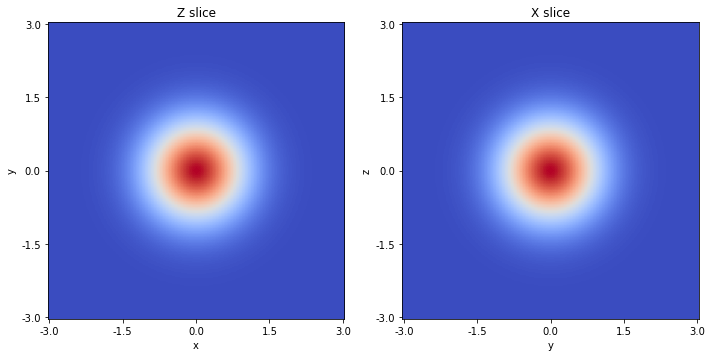

In [26]:
figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
z_slice = values.sel(z=0.0)
tick_locs = list(range(0, 101, 25))
tick_vals = np.linspace(values.coords['x'].values[0], values.coords['y'].values[-1], 5)
axes[0].imshow(z_slice, origin='lower', aspect='equal', cmap='coolwarm')
axes[0].set_title('Z slice')
axes[0].set_xlabel(z_slice.dims[0])
axes[0].set_xticks(tick_locs)
axes[0].set_xticklabels(f'{x:.1f}' for x in tick_vals)
axes[0].set_ylabel(z_slice.dims[1])
axes[0].set_yticks(tick_locs)
axes[0].set_yticklabels(f'{x:.1f}' for x in tick_vals)
x_slice = values.sel(x=0.0)
axes[1].imshow(x_slice, origin='lower', aspect='equal', cmap='coolwarm')
axes[1].set_title('X slice')
axes[1].set_xlabel(x_slice.dims[0])
axes[1].set_xticks(tick_locs)
axes[1].set_xticklabels(f'{x:.1f}' for x in tick_vals)
axes[1].set_ylabel(x_slice.dims[1])
axes[1].set_yticks(tick_locs)
axes[1].set_yticklabels(f'{x:.1f}' for x in tick_vals)
plt.tight_layout()

Note that labels and tick values are set according to information contained in the xarray representing the data.

## Interpolation

It is straightforward to interpolate data for coordinates that are missing in the xarray, e.g.,

In [27]:
float(values.interp(x=np.pi/2.0, y=np.pi/2.0, z=np.pi/2.0))

0.0002448162927385368

The interpolation is linear, and this function is highly non-linear, so the actual function values at the given point is different.

In [28]:
gaussian(np.pi/2.0, np.pi/2.0, np.pi/2.0)

0.00024331787691818835

However, other interpolation methods are available for 1-D interpolation, e.g., quadratic.

In [30]:
float(values.interp(x=np.pi/2.0, y=np.pi/2.0, z=np.pi/2.0, method="quadratic"))

0.0002433054503600994

Interpolation can be done for an entire plane of 3D data.

In [31]:
values.interp(x=np.pi/1.34)

<xarray.DataArray (y: 101, z: 101)>
array([[2.49746212e-11, 3.56682222e-11, 5.05751404e-11, ...,
        5.05751404e-11, 3.56682222e-11, 2.49746212e-11],
       [3.56682222e-11, 5.09405954e-11, 7.22303385e-11, ...,
        7.22303385e-11, 5.09405954e-11, 3.56682222e-11],
       [5.05751404e-11, 7.22303385e-11, 1.02417762e-10, ...,
        1.02417762e-10, 7.22303385e-11, 5.05751404e-11],
       ...,
       [5.05751404e-11, 7.22303385e-11, 1.02417762e-10, ...,
        1.02417762e-10, 7.22303385e-11, 5.05751404e-11],
       [3.56682222e-11, 5.09405954e-11, 7.22303385e-11, ...,
        7.22303385e-11, 5.09405954e-11, 3.56682222e-11],
       [2.49746212e-11, 3.56682222e-11, 5.05751404e-11, ...,
        5.05751404e-11, 3.56682222e-11, 2.49746212e-11]])
Coordinates:
  * y        (y) float64 -3.0 -2.94 -2.88 -2.82 -2.76 ... 2.82 2.88 2.94 3.0
  * z        (z) float64 -3.0 -2.94 -2.88 -2.82 -2.76 ... 2.82 2.88 2.94 3.0
    x        float64 2.344

## Combining data

### Concatenate

The `cnocatinate` function works similarly to what you would expect from numpy's counterpart. Two or more `DataArray`s are concatenated as in the following example.

In [32]:
x_vals = np.arange(0.0, 2.0*np.pi, 0.3)
signal1 = xr.DataArray(np.cos(x_vals), dims=('x', ), coords=(x_vals.copy(), ))
x_vals += 5.0*np.pi
signal2 = xr.DataArray(np.cos(x_vals), dims=('x', ), coords=(x_vals.copy(), ))

In [33]:
signal = xr.concat((signal1, signal2), dim='x')

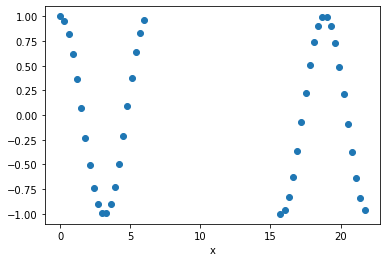

In [34]:
signal.plot.line('o')

However, the coordinates of the `DataArray`s can overlap, as the next example illustrates.

In [35]:
x_vals = np.linspace(0.0, 2.0*np.pi, 11)
signal1 = xr.DataArray(np.sin(x_vals), dims=('x', ), coords=(x_vals.copy(), ))
x_vals = np.linspace(0.0, np.pi, 20)
signal2 = xr.DataArray(np.sin(x_vals), dims=('x', ), coords=(x_vals.copy(), ))
signal = xr.concat((signal1, signal2), dim='x')

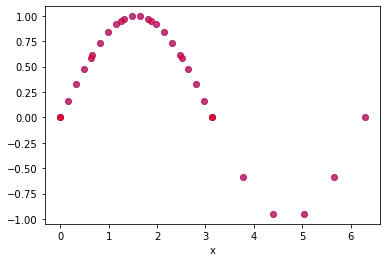

In [36]:
figure, axes = plt.subplots(nrows=1, ncols=1)
_ = signal.plot.line('bo', ax=axes, alpha=0.5)
_ = signal.plot.line('ro', ax=axes, alpha=0.5)

### `merge`

Two (or more) `DataArray` objects can be merged into a single `DataSet` object.  The coordinates are taken into account, and if one of the arrays has no values for the some coordinates, those are considered missing values, and represented as `NaN`.

Consider two `DataArray`s, one representing temperature measurements, the other pressure values.  Both data sets have $x$ and $y$ dimensions, but the coordinates differ.

In [41]:
temperature = xr.DataArray(np.random.normal(loc=20.0, scale=5.0, size=(5, 5)),
                           dims=('x', 'y'), coords={'x': np.linspace(0.0, 1.0, 5),
                                                    'y': np.linspace(0.0, 5.0, 5)},
                           name='temperature')

In [42]:
pressure = xr.DataArray(np.random.normal(loc=1001.0, scale=100.0, size=(5, 5)),
                        dims=('x', 'y'), coords={'x': np.linspace(0.0, 2.0, 5),
                                                 'y': np.linspace(0.0, 3.0, 5)},
                        name='pressure')

When the data is merged into a `DataSet`, missing values are present.

In [43]:
data = xr.merge((temperature, pressure))
data

<xarray.Dataset>
Dimensions:      (x: 7, y: 9)
Coordinates:
  * x            (x) float64 0.0 0.25 0.5 0.75 1.0 1.5 2.0
  * y            (y) float64 0.0 0.75 1.25 1.5 2.25 2.5 3.0 3.75 5.0
Data variables:
    temperature  (x, y) float64 17.95 nan 12.78 nan nan ... nan nan nan nan nan
    pressure     (x, y) float64 1.028e+03 1.041e+03 nan ... 1.048e+03 nan nan

We can visualize the missing data which shows up as yellow in the plot below.

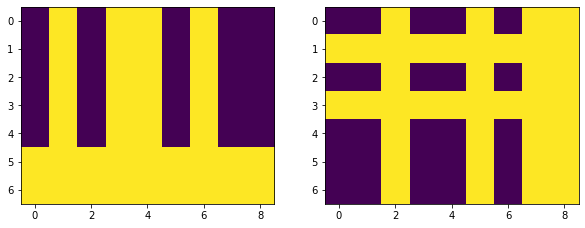

In [40]:
figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
missing_temp = np.where(np.isnan(data['temperature']), 1, 0)
_ = axes[0].imshow(missing_temp)
missing_pressure = np.where(np.isnan(data['pressure']), 1, 0)
_ = axes[1].imshow(missing_pressure)

### `combine_first`

This operation combines values from two `DataArrays`, using the second to fill holes in the first.  Coordinates for which there is no data in either `DataArray` will be filled with `NaN`.

In [44]:
temp1 = xr.DataArray(np.random.normal(loc=20.0, scale=5.0, size=(5, 5)),
                     dims=('x', 'y'), coords={'x': np.linspace(0.0, 1.0, 5),
                                              'y': np.linspace(0.0, 5.0, 5)},
                     name='temperature')

In [45]:
float(temp1[0, 0])

30.160769229047233

In [46]:
temp2 = xr.DataArray(np.random.normal(loc=1001.0, scale=100.0, size=(5, 5)),
                     dims=('x', 'y'), coords={'x': np.linspace(0.0, 2.0, 5),
                                              'y': np.linspace(0.0, 3.0, 5)},
                     name='temperature2')

In [47]:
float(temp2[0, 0])

973.5678681652961

In [48]:
data = temp1.combine_first(temp2)
data

<xarray.DataArray 'temperature' (x: 7, y: 9)>
array([[  30.16076923, 1160.79185574,   32.54207966, 1113.94567685,
         963.00125932,   20.6026758 , 1057.81260007,   13.57095518,
          19.26529006],
       [  16.78341091,           nan,   23.31879872,           nan,
                  nan,   19.11640522,           nan,   21.39861491,
          22.84965373],
       [  13.32311252,  845.73365403,   23.39301521, 1000.36159348,
        1040.53659612,   26.07197081,  939.0366407 ,   19.28379623,
          21.42944587],
       [  21.83136225,           nan,   24.74226117,           nan,
                  nan,   21.8661864 ,           nan,   20.2430489 ,
          11.04595042],
       [  22.8803161 , 1067.44064587,   22.89817798,  878.59124927,
         952.56961473,   17.06882593,  981.04218973,   22.01254996,
          24.510231  ],
       [ 860.50703651, 1111.03335793,           nan, 1185.63298016,
        1007.7042812 ,           nan,  974.22068628,           nan,
                  nan],
       [1007.9544592 ,  907.82943711,           nan, 1106.23513447,
        1115.1015106 ,           nan,  922.54767734,           nan,
                  nan]])
Coordinates:
  * x        (x) float64 0.0 0.25 0.5 0.75 1.0 1.5 2.0
  * y        (y) float64 0.0 0.75 1.25 1.5 2.25 2.5 3.0 3.75 5.0

We can visualize the origin of the data, either `temp1` in blue or `temp2` in red, as well as the missing data which shows up in white.

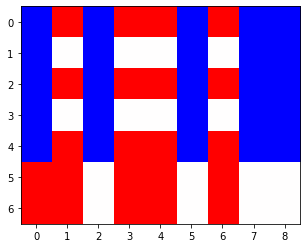

In [49]:
data_map = np.empty(data.shape)
with np.errstate(invalid='ignore'):
    data_map[data.values < 200.0] = -1.0
    data_map[data.values >= 200.0] = 1.0
data_map[np.isnan(data.values)] = 0.0
_ = plt.imshow(data_map, cmap='bwr')

The plot below illustrates that the `combine_first` operator is not symmetric, i.e., `temp1.combine_first(temp2)` is not the same `DataArray` as `temp2.combine_first(temp1)`.

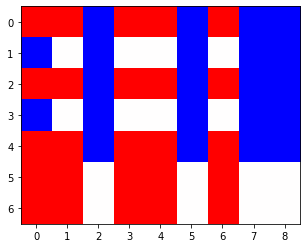

In [50]:
data = temp2.combine_first(temp1)
data_map = np.empty(data.shape)
with np.errstate(invalid='ignore'):
    data_map[data.values < 200.0] = -1.0
    data_map[data.values >= 200.0] = 1.0
data_map[np.isnan(data.values)] = 0.0
_ = plt.imshow(data_map, cmap='bwr')

As a second example, `combine_first` can also be used to concatenate two 1D `DataArray`'s. Data along the same dimension can be combined from several xarrays. Consider a sinusoidal signal.

In [51]:
x_vals = np.linspace(0.0, 2.0*np.pi, 15)
signal = xr.DataArray(np.sin(x_vals), dims=('x',), coords=(x_vals,), name='signal')
signal.shape

(15,)

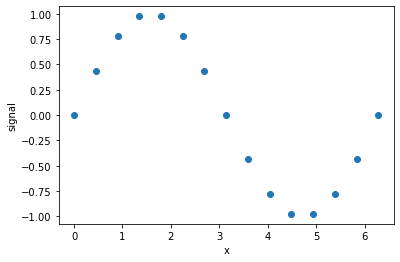

In [47]:
_ = signal.plot.line('o')

Create a second xarray by interpolating the signal.  Since this is 1D data, we can use quadratic interpolation, which is obviously better than the default, linear.

In [52]:
x_vals = np.arange(0.1, 2.0*np.pi, 0.1)
interp_signal = signal.interp(x=x_vals, method='quadratic')
interp_signal.shape

(62,)

In [53]:
interp_signal

<xarray.DataArray 'signal' (x: 62)>
array([ 0.10318894,  0.20264376,  0.29836444,  0.39035099,  0.47860341,
        0.56312169,  0.64375288,  0.71753198,  0.78331803,  0.84111103,
        0.89091097,  0.93216473,  0.96365124,  0.9853265 ,  0.99719052,
        0.99924235,  0.99146638,  0.97385707,  0.94641442,  0.90913843,
        0.86265968,  0.8082609 ,  0.74597955,  0.67581562,  0.5979443 ,
        0.51487769,  0.42743617,  0.33561975,  0.23942843,  0.14036215,
        0.04123119, -0.05789976, -0.15703071, -0.25590868, -0.35136437,
       -0.44244516, -0.52915105, -0.61148204, -0.68816475, -0.75700325,
       -0.81795917, -0.87103252, -0.91609399, -0.95171653, -0.97750573,
       -0.99346159, -0.99958412, -0.99588178, -0.98236804, -0.95904304,
       -0.92590681, -0.88309627, -0.83195232, -0.77281532, -0.70568526,
       -0.63056215, -0.54917135, -0.46402519, -0.37514489, -0.28253045,
       -0.18618189, -0.08609919])
Coordinates:
  * x        (x) float64 0.1 0.2 0.3 0.4 0.5 0.6 0.7 ... 5.7 5.8 5.9 6.0 6.1 6.2

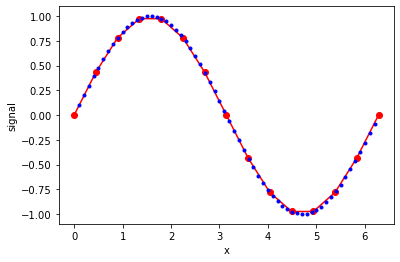

In [54]:
figure, axes = plt.subplots(nrows=1, ncols=1)
_ = signal.plot.line('r-o', ax=axes)
_ = interp_signal.plot.line('b.', ax=axes)

Combine the original and the interpolated signal into a single xarray.

In [55]:
combined = signal.combine_first(interp_signal)
combined.shape

(77,)

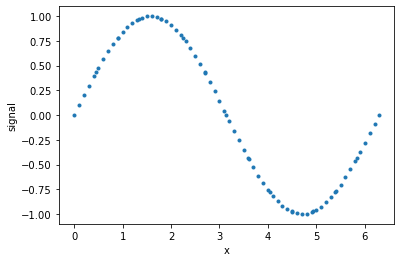

In [56]:
_ = combined.plot.line('.')

## Split-apply-combine: grouping

As in pandas, data in `DataArray`s can be grouped using the `group_by` method.  It is mostly done for data with categorical coordinates, and works similar to its pandas counterpart.  However, xarray has the `groupby_bins` method that is very convenient.

In [57]:
coords = np.arange(0.0, 20.0, 1.0)
temperature = xr.DataArray(np.random.normal(loc=20.0, scale=2.0, size=(coords.shape[0], coords.shape[0])),
                           dims=('x', 'y'), coords={'x': coords, 'y': coords}, name='temperature')

The data may be grouped by $x$ coordinates, e.g., into 5 bins.

In [58]:
bins = np.arange(-0.1, 20.1, 4.0)
labels = np.arange(2.0, 19.0, 4.0)
x_groups = temperature.groupby_bins('x', bins, labels=labels)

As labels for the bins, the midpoint of the bin intervals is chosen.  The resulting groups show that each of the five groups contains 4 indices along the $x$-axis.

In [59]:
x_groups.groups

{2.0: [0, 1, 2, 3],
 6.0: [4, 5, 6, 7],
 10.0: [8, 9, 10, 11],
 14.0: [12, 13, 14, 15],
 18.0: [16, 17, 18, 19]}

For each of these groups, we can print the label, the group's shape, and the average over the group.

In [60]:
for label, group in x_groups:
    print(f'{label} {group.shape}: {float(group.mean()):.6f}')

2.0 (4, 20): 19.740039
6.0 (4, 20): 19.956380
10.0 (4, 20): 19.833710
14.0 (4, 20): 20.210349
18.0 (4, 20): 19.883434


Using the `apply` method on a group-by object will perform the same computation, but combine the results back into a `DataArray` with the appropriate coordinates.

In [61]:
x_groups.apply(np.mean).rename({'x_bins': 'x'})

<xarray.DataArray 'temperature' (x: 5)>
array([19.74003914, 19.95637965, 19.83371025, 20.2103495 , 19.88343436])
Coordinates:
  * x        (x) float64 2.0 6.0 10.0 14.0 18.0

Although there seems to be no way to bin directly in two dimensions, this can easily be achieved by using `apply` at two levels.

In [62]:
coarse_temp = x_groups.apply(lambda x: x.groupby_bins('y', bins, labels=labels).apply(np.mean))\
                      .rename({'x_bins': 'x', 'y_bins': 'y'})
coarse_temp

<xarray.DataArray 'temperature' (x: 5, y: 5)>
array([[20.27900716, 19.84760764, 19.45199068, 19.38471107, 19.73687915],
       [19.92500993, 19.86829183, 20.6684436 , 19.39024996, 19.92990292],
       [20.61101087, 19.40372366, 20.07905835, 18.72817246, 20.34658592],
       [20.01903605, 20.80194921, 20.4077706 , 20.69507883, 19.12791281],
       [19.37891485, 20.40884597, 20.23977211, 19.05371739, 20.33592149]])
Coordinates:
  * x        (x) float64 2.0 6.0 10.0 14.0 18.0
  * y        (y) float64 2.0 6.0 10.0 14.0 18.0

To verify, compare the upper-left and lower-right elements of `coarse_temp` with the explicitely computed mean value of those subarrays.

In [63]:
np.isclose(temperature[0:4, 0:4].mean(), coarse_temp[0, 0], rtol=1.0e-7)

True

In [64]:
np.isclose(temperature[-4:, -4:].mean(), coarse_temp[-1, -1], rtol=1.0e-7)

True

We can visualize the coarsening process by plotting a heatmap of the original and the coarsened data.

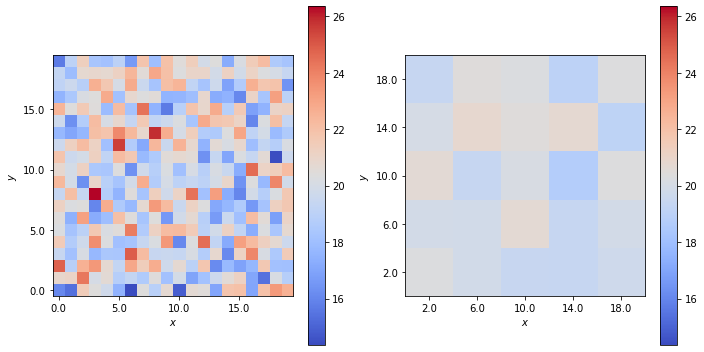

In [68]:
vmin = float(temperature.min())
vmax = float(temperature.max())
figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
# plot of tempeature
t_plot = axes[0].imshow(temperature, cmap='coolwarm', origin='lower',
                        vmin=vmin, vmax=vmax)
axes[0].set_xlabel('$x$')
tick_pos = list(range(0, 20, 5))
axes[0].set_xticks(tick_pos)
axes[0].set_xticklabels(f'{float(x):.1f}' for x in temperature.coords['x'][tick_pos])
axes[0].set_ylabel('$y$')
axes[0].set_yticks(tick_pos)
axes[0].set_yticklabels(f'{float(x):.1f}' for x in temperature.coords['y'][tick_pos])
figure.colorbar(t_plot, ax=axes[0])
# plot of coarse_temp
c_plot = axes[1].imshow(coarse_temp, cmap='coolwarm', origin='lower',
                        vmin=vmin, vmax=vmax)
axes[1].set_xlabel('$x$')
axes[1].set_xticks(range(len(coarse_temp.coords['x'])))
axes[1].set_xticklabels(f'{float(x):.1f}' for x in coarse_temp.coords['x'])
axes[1].set_ylabel('$y$')
axes[1].set_yticks(range(len(coarse_temp.coords['y'])))
axes[1].set_yticklabels(f'{float(x):.1f}' for x in coarse_temp.coords['y'])
figure.colorbar(t_plot, ax=axes[1])
plt.tight_layout()

## Time series

Working with multi-dimensional time series data is straightforward with xarray.  A sequence of timestamps can be created using pandas. We will use this to index a 3D array, where the third dimension represents time.

In [69]:
x_coords = np.linspace(-2.0, 2.0, 5)
y_coords = np.linspace(-3.0, 3.0, 7)
timestamps = pd.date_range('2019-07-01', freq='6H', periods=10)
data = xr.DataArray(np.empty((len(x_coords), len(y_coords), len(timestamps))),
                    dims=('x', 'y', 't'), coords=(x_coords, y_coords, timestamps))

We initialize the data, starting from random values at $t = 0$, and computing the data at $t + 1$ from the data at time $t$.

In [70]:
data[:, :, 0] = np.random.normal(loc=0.0, scale=1.0,
                                 size=(data.coords['x'].shape[0], data.coords['y'].shape[0]))
for t in range(1, data.coords['t'].shape[0]):
    data[:, :, t] = data[:, :, t - 1] + np.random.normal(loc=0.0, scale=0.1, size=data[:, :, 0].shape)

For each timestamp, we can print the mean and standard deviation over the data.

In [95]:
for t, time in enumerate(data.coords['t'][1:]):
    diff = data.isel(t=t) - data.isel(t=t - 1)
    time_str = time.dt.strftime('%Y-%m-%d %H:%M').item()
    print(f'mean: {float(diff.mean()):+0.3f}, stddev: {float(diff.std()):0.3f} ({time_str})')

mean: -0.015, stddev: 0.295 (2019-07-01 06:00)
mean: -0.007, stddev: 0.088 (2019-07-01 12:00)
mean: +0.015, stddev: 0.074 (2019-07-01 18:00)
mean: +0.014, stddev: 0.080 (2019-07-02 00:00)
mean: -0.030, stddev: 0.123 (2019-07-02 06:00)
mean: +0.021, stddev: 0.103 (2019-07-02 12:00)
mean: -0.020, stddev: 0.101 (2019-07-02 18:00)
mean: +0.007, stddev: 0.078 (2019-07-03 00:00)
mean: -0.025, stddev: 0.089 (2019-07-03 06:00)


In [96]:
mean_data = data.mean(dim=('x', 'y'))
mean_data.name = 'mean values'

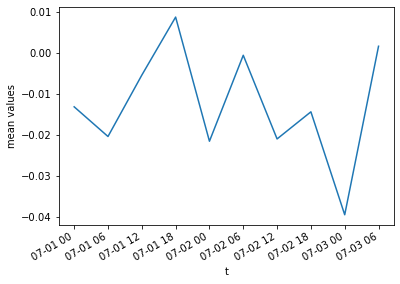

In [97]:
_ = mean_data.plot()

Note that the plot's $x$-axis is labeled appropriately, i.e, with the date and time only.

The data can be indexed by a string representing a timestamp.

In [98]:
data.sel(t='2019-07-02 06:00:00')

<xarray.DataArray (x: 5, y: 7)>
array([[-0.3412283 , -0.44141319, -3.12353046,  0.4575659 ,  0.67887657,
         0.48948429, -0.44117579],
       [-0.12299757,  0.44510657,  0.67707235, -0.56301321,  1.64253884,
        -0.07242632,  0.62863607],
       [ 0.65069085,  0.60879499,  2.13238478, -1.16405391,  0.9204897 ,
         0.79807465,  0.55849914],
       [ 0.25519679, -0.57028363, -0.90245524,  0.34766021,  1.85823148,
         1.07159815, -2.82977829],
       [-1.5539603 , -1.42375053, -1.08684066,  0.2109889 , -0.29453301,
         0.46183656,  0.01838815]])
Coordinates:
  * x        (x) float64 -2.0 -1.0 0.0 1.0 2.0
  * y        (y) float64 -3.0 -2.0 -1.0 0.0 1.0 2.0 3.0
    t        datetime64[ns] 2019-07-02T06:00:00

When indexing with a date, all data for that date is returned.

In [99]:
data.sel(t='2019-07-02').coords['t']

<xarray.DataArray 't' (t: 4)>
array(['2019-07-02T00:00:00.000000000', '2019-07-02T06:00:00.000000000',
       '2019-07-02T12:00:00.000000000', '2019-07-02T18:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * t        (t) datetime64[ns] 2019-07-02 ... 2019-07-02T18:00:00

The data can also be sliced along the time coordinate.

In [100]:
data.sel(t=slice('2019-07-02 02:00:00', '2019-07-02 20:00:00')).coords['t']

<xarray.DataArray 't' (t: 3)>
array(['2019-07-02T06:00:00.000000000', '2019-07-02T12:00:00.000000000',
       '2019-07-02T18:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * t        (t) datetime64[ns] 2019-07-02T06:00:00 ... 2019-07-02T18:00:00

Plotting the values at some point in time is now easy.

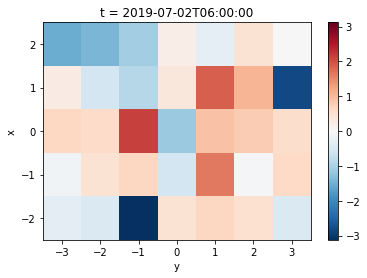

In [101]:
_ = data.sel(t='2019-07-02 06:00:00').plot()

Time data can be resampled using the `groupby` function.

In [106]:
data.groupby('t.day').mean()

<xarray.DataArray (x: 5, y: 7, day: 3)>
array([[[-0.46291318, -0.39637169, -0.07841252],
        [-0.39702317, -0.44815594, -0.4006401 ],
        [-2.96951364, -3.1924674 , -3.22419747],
        [ 0.63984448,  0.43730983,  0.55409257],
        [ 0.55182783,  0.70007055,  0.79375391],
        [ 0.27841046,  0.40519602,  0.15229262],
        [-0.33689048, -0.41237619, -0.46285354]],

       [[-0.3200796 , -0.08341457,  0.14228792],
        [ 0.33866051,  0.36467424,  0.26528276],
        [ 0.73958916,  0.73287116,  0.62997225],
        [-0.17944376, -0.53313053, -0.55882628],
        [ 1.67114844,  1.5620275 ,  1.42223704],
        [-0.20170789, -0.09616273,  0.01273292],
        [ 0.5997237 ,  0.54545052,  0.55801778]],

       [[ 0.56069543,  0.61593755,  0.76182785],
        [ 0.48387653,  0.50353675,  0.41104512],
        [ 2.01396939,  2.09066303,  2.02752534],
        [-1.2154396 , -1.23475548, -1.26299435],
        [ 0.78624824,  0.95478107,  0.71358529],
        [ 0.89168616,  0.73441534,  0.70084937],
        [ 0.62710838,  0.62141553,  0.48262359]],

       [[ 0.30075387,  0.22651747,  0.35977035],
        [-0.71448025, -0.56899808, -0.67843257],
        [-0.62399081, -0.89999181, -0.94120974],
        [ 0.43679156,  0.40165305,  0.44681311],
        [ 2.41439815,  1.82721954,  1.79978283],
        [ 1.05004863,  1.06567837,  0.89642676],
        [-2.60614422, -2.83196682, -2.80953678]],

       [[-1.59392823, -1.51303191, -1.45941633],
        [-1.54059522, -1.44898541, -1.49102598],
        [-1.36019679, -1.15860528, -1.318973  ],
        [-0.18104163,  0.20354281,  0.2574422 ],
        [-0.20565196, -0.33182611, -0.39025233],
        [ 0.41837562,  0.52777681,  0.75237673],
        [-0.15815372,  0.12664222,  0.2733762 ]]])
Coordinates:
  * x        (x) float64 -2.0 -1.0 0.0 1.0 2.0
  * y        (y) float64 -3.0 -2.0 -1.0 0.0 1.0 2.0 3.0
  * day      (day) int64 1 2 3

However, it is more convenient to use the `resample` method.

In [109]:
data.resample(t='24H').mean()

<xarray.DataArray (x: 5, y: 7, t: 3)>
array([[[-0.46291318, -0.39637169, -0.07841252],
        [-0.39702317, -0.44815594, -0.4006401 ],
        [-2.96951364, -3.1924674 , -3.22419747],
        [ 0.63984448,  0.43730983,  0.55409257],
        [ 0.55182783,  0.70007055,  0.79375391],
        [ 0.27841046,  0.40519602,  0.15229262],
        [-0.33689048, -0.41237619, -0.46285354]],

       [[-0.3200796 , -0.08341457,  0.14228792],
        [ 0.33866051,  0.36467424,  0.26528276],
        [ 0.73958916,  0.73287116,  0.62997225],
        [-0.17944376, -0.53313053, -0.55882628],
        [ 1.67114844,  1.5620275 ,  1.42223704],
        [-0.20170789, -0.09616273,  0.01273292],
        [ 0.5997237 ,  0.54545052,  0.55801778]],

       [[ 0.56069543,  0.61593755,  0.76182785],
        [ 0.48387653,  0.50353675,  0.41104512],
        [ 2.01396939,  2.09066303,  2.02752534],
        [-1.2154396 , -1.23475548, -1.26299435],
        [ 0.78624824,  0.95478107,  0.71358529],
        [ 0.89168616,  0.73441534,  0.70084937],
        [ 0.62710838,  0.62141553,  0.48262359]],

       [[ 0.30075387,  0.22651747,  0.35977035],
        [-0.71448025, -0.56899808, -0.67843257],
        [-0.62399081, -0.89999181, -0.94120974],
        [ 0.43679156,  0.40165305,  0.44681311],
        [ 2.41439815,  1.82721954,  1.79978283],
        [ 1.05004863,  1.06567837,  0.89642676],
        [-2.60614422, -2.83196682, -2.80953678]],

       [[-1.59392823, -1.51303191, -1.45941633],
        [-1.54059522, -1.44898541, -1.49102598],
        [-1.36019679, -1.15860528, -1.318973  ],
        [-0.18104163,  0.20354281,  0.2574422 ],
        [-0.20565196, -0.33182611, -0.39025233],
        [ 0.41837562,  0.52777681,  0.75237673],
        [-0.15815372,  0.12664222,  0.2733762 ]]])
Coordinates:
  * t        (t) datetime64[ns] 2019-07-01 2019-07-02 2019-07-03
  * x        (x) float64 -2.0 -1.0 0.0 1.0 2.0
  * y        (y) float64 -3.0 -2.0 -1.0 0.0 1.0 2.0 3.0